<a href="https://colab.research.google.com/github/Piaozan/29CM/blob/main/4_%E6%A0%B8%E5%BF%83%E7%94%A8%E6%88%B7%E7%89%B9%E5%BE%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & read file

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

import warnings
warnings.filterwarnings(action='ignore')

sns.set_palette("RdBu")

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [38]:
from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

user_total = pd.read_csv('/content/gdrive/MyDrive/final/data/commerce/user_total.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 核心用户 & 非核心用户 特征

In [39]:
# 把0，1改成英文，以便容易识别
user_total['buyer'] = np.where(user_total['buyer'] == 1, ' buyer','non_buyer')
user_total['power_user'] = np.where(user_total['power_user'] == 1, 'vip','non_vip')

In [40]:
user_total.head(2)

,user_no,buy_cnt,price,power_user,click_cnt,cart_cnt,like_cnt,buyer,mobile_brand_name,region,platform,gender,年龄分类,服装,生活/健康,运动/休闲,杂货,化妆品/美容,家居,文化,数码/家电,食品,儿童,家畜,成人节,Sun,Mon,Tue,Wed,Thu,Fri,Sat,item_per_price,0H,1H,2H,3H,4H,5H,6H,7H,8H,9H,10H,11H,12H,13H,14H,15H,16H,17H,18H,19H,20H,21H,22H,23H
0,b2xZVfUtjyGsZckO7j6zkg==,246,28841100.0,vip,7534.0,0.0,0.0,buyer,Apple,Chungcheongnam-do,IOS,F,40,238.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,23.0,42.0,31.0,37.0,34.0,50.0,117240.243902,7.0,8.0,5.0,0.0,0.0,0.0,10.0,6.0,12.0,13.0,12.0,13.0,10.0,14.0,12.0,15.0,19.0,19.0,18.0,8.0,17.0,6.0,15.0,7.0
1,anAN3a+fvEnnvFdQ61+Egw==,203,22966700.0,vip,325.0,105.0,0.0,buyer,Samsung,Seoul,ANDROID,F,40,171.0,9.0,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,0.0,0.0,13.0,113136.453202,13.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0


## 行为 & 购买金额


## 包含购买者 & 未购买者

In [41]:
# 行为， 不包括收藏 & 购物车

action = np.round(user_total.pivot_table(index = ['power_user'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '人均点击量', 'buy_cnt':'人均购买数','price':'总金额','item_per_price':'客单价'})

,人均点击量,人均购买数,总金额,客单价
power_user,,,,
non_vip,11.35,0.58,27605.67,21967.79
vip,38.93,5.32,343198.60,82557.92


In [42]:
print(f'核心用户的转化率（点击->购买）为 {round((action.iloc[-1,1] / action.iloc[-1,0]) * 100, 2)} %')
print(f'非核心用户的转化率（点击->购买）为 {round((action.iloc[0,1] / action.iloc[0,0]) * 100, 2)} %')

核心用户的转化率（点击->购买）为 13.67 %
非核心用户的转化率（点击->购买）为 5.11 %


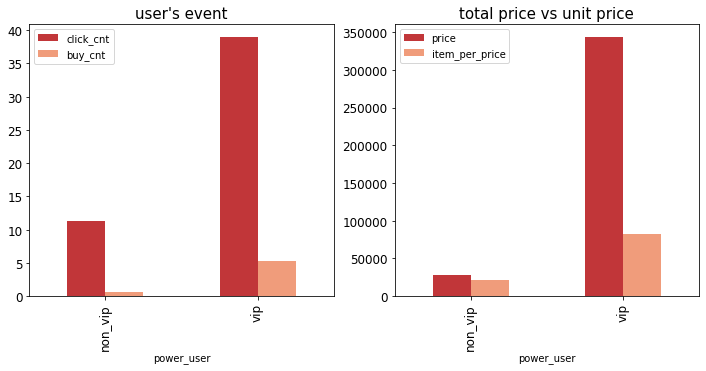

In [43]:
f,ax = plt.subplots(1,2, figsize=(12,5))

action.iloc[:,:-2].plot.bar(fontsize=12, ax=ax[0])
ax[0].set_title("user's event", fontsize=15)

action.iloc[:,-2:].plot.bar(fontsize=12, ax=ax[1])
plt.title('total price vs unit price', fontsize=15)
plt.show()

**用户行为**
- 由于苹果用户没有关于购物车与收藏的数据，因此只选取了点击量与购买数
- 核心用户从点击量至购买的转化率比非核心用户高3倍左右
- 非核心用户中由于还有未购买用户，因此其数值可能会导致比较低，以后可以仅查看购买者当中非核心用户的转化率

**总金额 vs 客单价**
- **非核心用户**的总金额与客单价的差距不太大，金额也不高
    - 即，非核心用户不买高额的商品，且买的数量也很少
    - 然而，这里也还需要考虑一下购买者与非购买者之间的影响

- 反而, **核心用户**买的次数以及金额都比较高

## 购买者 & 非购买者 之间的行为差距

In [44]:
action = np.round(user_total.pivot_table(index = ['power_user','buyer'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action.rename(columns = {'click_cnt' : '人均点击量', 'buy_cnt':'人均购买数','price':'总金额','item_per_price':'客单价'})

人均点击量  人均购买数        总金额       客单价
power_user buyer                                       
non_vip     buyer      9.98   1.37   64619.22  51422.10
           non_buyer  12.38   0.00       0.00      0.00
vip         buyer     38.93   5.32  343198.60  82557.92

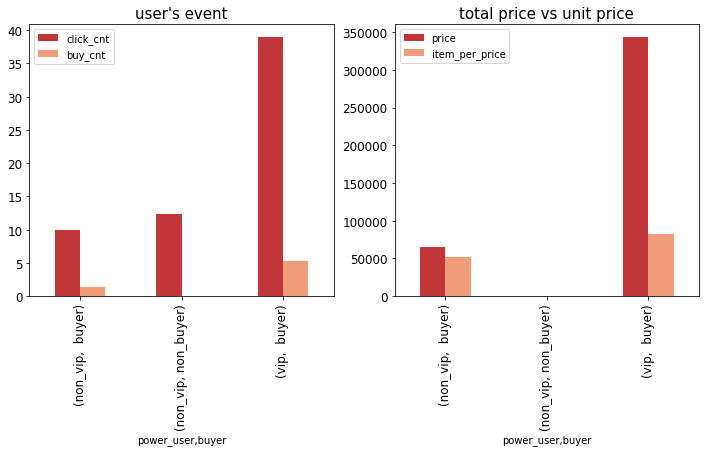

In [45]:
f,ax = plt.subplots(1,2, figsize=(12,5))

action.iloc[:,:-2].plot.bar(fontsize=12, ax=ax[0])
ax[0].set_title("user's event", fontsize=15)

action.iloc[:,-2:].plot.bar(fontsize=12, ax=ax[1])
plt.title('total price vs unit price', fontsize=15)
plt.show()

- 查看一下，非核心用户当中购买者与非购买者的区别

**用户行为**
- **非核心用户当中，非购买者的点击量多于购买者，却不购买**
- 这也许是, **非购买者**看来，app上没有自己想要的商品，或者也有可能是个人性格问题

**总金额 vs 客单价**
- **非核心用户当中**，他们的总金额与客单价的差距不大，可知，他们一般只会买一样商品。
- 而且，与核心用户相比，其客单价差距不是很大，可知他们买的商品的价格，并不会很低。

## platform（渠道）

In [46]:
action = np.round(user_total.pivot_table(index = ['power_user','platform'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['conversion rate'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','conversion rate','price','item_per_price']]
action.rename(columns = {'click_cnt' : '人均点击量', 'buy_cnt':'人均购买数','conversion rate':'转化率', 'price':'总金额','item_per_price':'客单价'})

人均点击量  人均购买数    转化率        总金额       客单价
power_user platform                                          
non_vip    ANDROID    7.72   0.51   6.61   24335.24  19375.13
           IOS       12.62   0.61   4.83   28740.62  22867.53
vip        ANDROID   36.34   5.63  15.49  370184.79  86348.55
           IOS       39.74   5.23  13.16  334859.37  81386.55

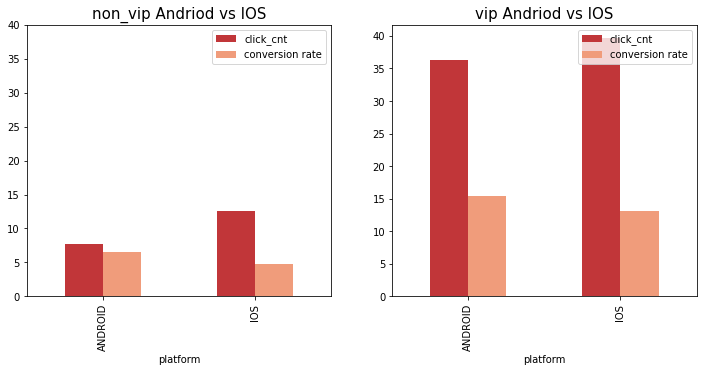

In [47]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['non_vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[0])
ax[0].set_title('non_vip Andriod vs IOS', fontsize=15)
ax[0].set(ylim=(0, 40))

action.loc['vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[1])
ax[1].set_title('vip Andriod vs IOS', fontsize=15)

plt.show()

- 虽然安卓用户与苹果用户差距不大
- 但是，整体上，安卓用户的点击量少于苹果用户，反而转化率高于苹果用户

## 性别

In [48]:
action = np.round(user_total.pivot_table(index = ['power_user','gender'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['conversion rate'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','conversion rate','price','item_per_price']]
action.rename(columns = {'click_cnt' : '人均点击量', 'buy_cnt':'人均购买数','conversion rate':'转化率', 'price':'总金额','item_per_price':'客单价'})

人均点击量  人均购买数    转化率        总金额       客单价
power_user gender                                          
non_vip    F       12.86   0.60   4.67   27604.96  21836.41
           M        8.47   0.63   7.44   31718.98  25610.06
vip        F       44.52   5.59  12.56  353781.11  79150.99
           M       25.87   4.78  18.48  329243.81  92508.61

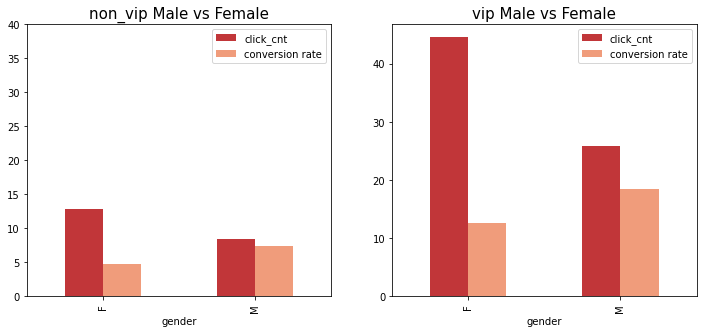

In [49]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['non_vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[0])
ax[0].set_title('non_vip Male vs Female', fontsize=15)
ax[0].set(ylim=(0, 40))

action.loc['vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[1])
ax[1].set_title('vip Male vs Female', fontsize=15)

plt.show()

- 不管是核心用户，还是非核心用户，女性整体上的点击量比男性高两倍左右
- 然而，转化率却比男性低两倍左右

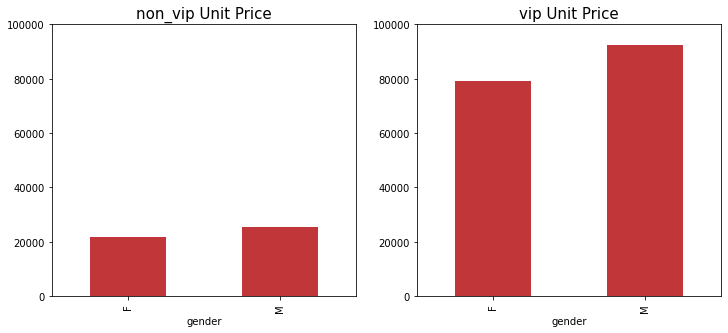

In [50]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['non_vip', 'item_per_price'].plot.bar(ax=ax[0])
ax[0].set_title('non_vip Unit Price', fontsize=15)
ax[0].set(ylim=(0, 100000))

action.loc['vip', 'item_per_price'].plot.bar(ax=ax[1])
ax[1].set_title('vip Unit Price', fontsize=15)
ax[1].set(ylim=(0, 100000))

plt.show()

- 同时，男性整体上的客单价也高于女性
- 而购物数却没有太大差异，可知男性一般买的商品价格高于女性

## 年龄

In [52]:
user_ages = user_total[(user_total['年龄分类'] == 20) | 
                       (user_total['年龄分类'] == 30) |
                       (user_total['年龄分类'] == 40) |
                       (user_total['年龄分类'] == 50) ]

action = np.round(user_ages.pivot_table(index = ['power_user','年龄分类'], values = ['buy_cnt','click_cnt','price','item_per_price'] ,aggfunc='mean'), 2)
action = action[['click_cnt','buy_cnt','price','item_per_price']]
action['conversion rate'] = np.round(action.iloc[:,1] / action.iloc[:,0] * 100, 2)
action = action[['click_cnt','buy_cnt','conversion rate','price','item_per_price']]
action.rename(columns = {'click_cnt' : '人均点击量', 'buy_cnt':'人均购买数','conversion rate':'转化率','price':'总金额','item_per_price':'客单价'})

人均点击量  人均购买数    转化率        总金额       客单价
power_user 年龄分类                                          
non_vip    20    11.84   0.61   5.15   28854.01  22988.28
           30    11.91   0.60   5.04   28796.15  22808.68
           40    12.23   0.55   4.50   25480.13  20025.44
           50    12.59   0.60   4.77   28562.54  22973.43
vip        20    35.44   4.91  13.85  314214.88  80890.43
           30    41.14   5.61  13.64  362492.21  82441.09
           40    52.18   6.38  12.23  408542.77  82698.50
           50    58.26   6.39  10.97  430147.55  87506.66

In [56]:
action

click_cnt  buy_cnt  conversion rate      price  \
power_user 年龄分类                                                   
non_vip    20        11.84     0.61             5.15   28854.01   
           30        11.91     0.60             5.04   28796.15   
           40        12.23     0.55             4.50   25480.13   
           50        12.59     0.60             4.77   28562.54   
vip        20        35.44     4.91            13.85  314214.88   
           30        41.14     5.61            13.64  362492.21   
           40        52.18     6.38            12.23  408542.77   
           50        58.26     6.39            10.97  430147.55   

                 item_per_price  
power_user 年龄分类                  
non_vip    20          22988.28  
           30          22808.68  
           40          20025.44  
           50          22973.43  
vip        20          80890.43  
           30          82441.09  
           40          82698.50  
           50          87506.66

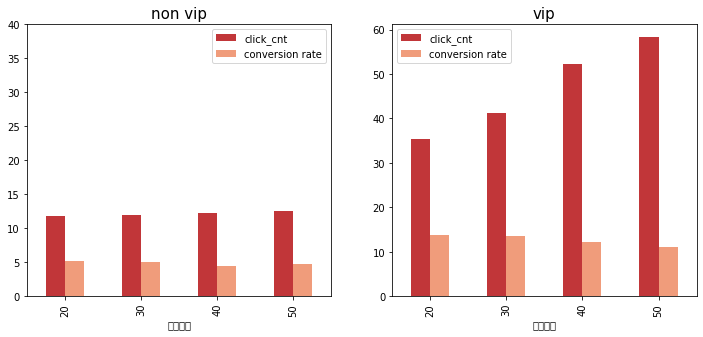

In [61]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['non_vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[0])
ax[0].set_title('non vip', fontsize=15)
ax[0].set(ylim=(0, 40))

action.loc['vip', ['click_cnt','conversion rate']].plot.bar(ax=ax[1])
ax[1].set_title('vip', fontsize=15)

plt.show()

- **非核心用户** : 点击量与转化率与年龄没有太大关系
- **核心用户** : 年龄越高，具有点击量越多的趋势，而转化率却会下降

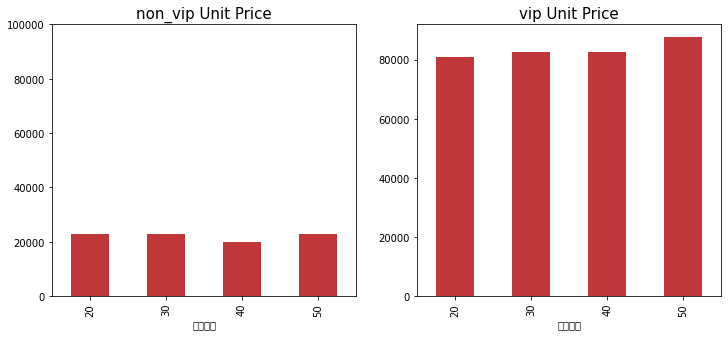

In [62]:
f,ax = plt.subplots(1,2, figsize=(12,5))
action.loc['non_vip', 'item_per_price'].plot.bar(ax=ax[0])
ax[0].set_title('non_vip Unit Price', fontsize=15)
ax[0].set(ylim=(0, 100000))

action.loc['vip', 'item_per_price'].plot.bar(ax=ax[1])
ax[1].set_title('vip Unit Price', fontsize=15)

plt.show()

- **非核心用户** : 年龄与客单价没有太大关系
- **核心用户** : 年龄越高，客单价越高

## 时间段

In [68]:
# 행동 패턴

action = np.round(user_total.pivot_table(index = ['power_user'], values = ['0H','1H','2H','3H','4H','5H','6H','7H','8H','9H','10H',
                                                                           '11H','12H','13H','14H','15H','16H','17H','18H','19H',
                                                                           '20H','21H','22H','23H'] ,aggfunc='mean'), 2)
action.columns = ['0H','1H','2H','3H','4H','5H','6H','7H','8H','9H','10H',
                  '11H','12H','13H','14H','15H','16H','17H','18H','19H',
                  '20H','21H','22H','23H']
action.sort_values(by='vip', axis=1, ascending=False)

,15H,14H,13H,0H,2H,3H,4H,12H,7H,6H,5H,1H,8H,9H,10H,11H,23H,22H,16H,21H,17H,20H,18H,19H
power_user,,,,,,,,,,,,,,,,,,,,,,,,
non_vip,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.00
vip,0.43,0.39,0.33,0.32,0.28,0.28,0.28,0.27,0.27,0.27,0.26,0.25,0.24,0.23,0.23,0.21,0.21,0.16,0.12,0.10,0.07,0.05,0.04,0.04


- **非核心用户** ： 时间段与购买数没有太大关系
- **核心用户** ： 
    - 核心用户最喜欢在13-15点购买商品
    - 其次，喜欢在凌晨0-4点喜欢购买商品
                

# 结论

- **核心用户**：
    - 性别： 29CM的男性用户暂时还不太多，而男性的转化率比较高，因此在商品推销方面能够放出一些男性更为专注的品牌/商品
    - 年龄 ： 主要用户20-30多岁用户的点击量比较少，而转化率比较高，可知app上的商品推荐以及展示非常符合他们的取向，而无法了解其跳出率是本次分析的缺陷
    - 时间 ： 核心用户主要喜欢的时间点为13-15，0-4点，因此，可在这个阶段前些阶段能够发出优惠券或者其他能够促使购买行为的营销活动

- **非核心用户**：
    - 购买者 ： 该用户的相当部分是只购买一次，且客单价比较高，因此，应该需要促使该用户群转换为核心用户。而他们不购买多次的原因可能分为这几点：
        - 快递运费高
        - 没有想要的商品
        - 商品价格太贵
        - 可在这几点上着重策划，也许能够回去的好效果、
    - 通过性别、年龄、时间段可知，这些因素与对非核心用户的购买者特征并没有产生太大的影响，可知，这些用户还未对29CM的使用并没有太大的兴趣。